In [1]:
# import arnie
# import matplotlib.pyplot as plt
# from arnie.bpps import bpps
# import numpy as np
# import pandas as pd
# from pathlib import Path
# import os
# from tqdm import tqdm
# import torch
# import random
# def matrix_to_three_columns_np(bpp_matrix):
#     pos_1, pos_2 = np.nonzero(bpp_matrix)
#     probabilities = bpp_matrix[pos_1, pos_2]
#     result = np.column_stack((pos_1 + 1, pos_2 + 1, probabilities))
#     return result.astype('float16')

# def get_bpp(sequnce, package):
#     return bpps(sequnce, package=package)


# def save_bpp(row, save_dir, package):
#     name = save_dir/f"{row.sequence_id}.npy"
#     bpp = get_bpp(row.sequence, package)
#     np.save(name, matrix_to_three_columns_np(bpp))
    
# pkg_name = "contrafold_2" #"vienna_2" #
# path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
# save_dir = path/f'bpp/{pkg_name}/'
# os.makedirs(save_dir, exist_ok=True)
# df = pd.read_parquet(path/'train_ss_vienna_rna.parquet')[['sequence_id', 'sequence']]
# df

# for i in tqdm(range(df.shape[0])):
#     save_bpp(df.iloc[i], save_dir, pkg_name)

In [2]:
from PIL import Image
import random
from scipy.sparse import coo_matrix
import arnie
import matplotlib.pyplot as plt
from arnie.bpps import bpps
import numpy as np
import pandas as pd
from pathlib import Path
import os
from tqdm import tqdm
import torch
from joblib import Parallel, delayed
from scipy.io import mmwrite


ModuleNotFoundError: No module named 'arnie'

In [6]:


def matrix_to_three_columns_np(bpp_matrix):
    pos_1, pos_2 = np.nonzero(bpp_matrix)
    probabilities = bpp_matrix[pos_1, pos_2]
    # Create an empty structured array with desired data types for each column
    if bpp_matrix.shape[-1] > 255:
        dt = np.dtype([('pos_1', 'int'), ('pos_2', 'int'), ('probabilities', 'float16')])
    else:
        dt = np.dtype([('pos_1', 'uint8'), ('pos_2', 'uint8'), ('probabilities', 'float16')])
        
    result = np.zeros(len(pos_1), dtype=dt)
    # Fill the structured array with values
    result['pos_1'] = pos_1
    result['pos_2'] = pos_2 
    result['probabilities'] = probabilities
    return result

def get_bpp(sequnce, package):
    return bpps(sequnce, package=package)

def save_bpp(row, save_dir, package):
    name = save_dir/f"{row.sequence_id}.npy"
    try:
        bpp = get_bpp(row.sequence, package)
        np.save(name, matrix_to_three_columns_np(bpp))
    except:
        pass


names = []
def save_png(row, save_dir, package):
    name = save_dir/f"{row.sequence_id}.png"
    try:
        bpp = get_bpp(row.sequence, package)
        Image.fromarray((bpp* 255).astype('uint8')).save(name)
    except:
        names.append(name)
        
# def save_sparse(row, save_dir, package):
#     name = save_dir/f"{row.sequence_id}.mtx"
#     try:
#         bpp = get_bpp(row.sequence, package).astype('float16')
#         sparse = coo_matrix(bpp)
#         mmwrite(name, sparse)
#     except:
#         names.append(name)
        
    
# pkg_name = "contrafold_2" 
# path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
# save_dir = path/f'bpp/{pkg_name}/'
# os.makedirs(save_dir, exist_ok=True)
# df = pd.read_parquet(path/'test_ss_vienna_rna.parquet')[['sequence_id', 'sequence']]
# df["L"] = df['sequence'].map(len)
# df = df.query('L>250')
# df.sort_values(by='L',ascending=False, inplace=True)

# # Using joblib to parallelize the tasks
# results = Parallel(n_jobs=16)(delayed(save_bpp)(row, save_dir, pkg_name) for _, row in tqdm(df.iterrows(), total=df.shape[0]))
# print(names)

In [54]:
#fns = list(save_dir.glob('*.npy'))
import shutil
pkg_name = "contrafold_2" 
path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
save_dir = path/f'bpp/{pkg_name}/'
fns = [save_dir/f"{i}.npy" for i in df['sequence_id'].to_list()]
new_dir  = path/f'bpp/{pkg_name}_8000/'
os.makedirs(new_dir, exist_ok=True)
for fn in tqdm(fns):
    shutil.copy(fn, new_dir)


  0%|          | 0/8000 [00:00<?, ?it/s]100%|██████████| 8000/8000 [00:01<00:00, 6075.23it/s]


In [55]:
fns = list(new_dir.glob('*.npy'))

In [12]:
def load_and_convert(filename, N):
    """
    Load data from a .npy file and convert it to an N x N matrix.

    Parameters:
    - filename: Path to the .npy file.
    - N: Dimension of the square matrix.

    Returns:
    - bpp_matrix: N x N matrix reconstructed from the input file.
    """
    # Load the structured array from the .npy file
    data = np.load(filename)

    # Create an empty N x N matrix
    bpp_matrix = np.zeros((N, N))

    # Fill the matrix with the probabilities from the loaded data
    bpp_matrix[data['pos_1'], data['pos_2']] = data['probabilities']

    return bpp_matrix

In [ ]:
df =

In [7]:


    
pkg_name = "eternafold" 
path = Path('/mnt/e22b12fe-f946-49d6-be2c-4bd0bb62c767/slh/rna/eda/')
save_dir = path/f'bpp/rmdb_data/{pkg_name}/'
os.makedirs(save_dir, exist_ok=True)
df =  pd.read_csv('../data/rmdb_data.v1.3.0.csv')[['sequence_id', 'sequence']].drop_duplicates(subset=['sequence_id'])
df["L"] = df['sequence'].map(len)
df.sort_values(by='L',ascending=False, inplace=True)

# Using joblib to parallelize the tasks
results = Parallel(n_jobs=16)(delayed(save_bpp)(row, save_dir, pkg_name) for _, row in tqdm(df.iterrows(), total=df.shape[0]))
print(names)

In [ ]:
!ls bpp/rmdb_data/contrafold_2

000259cf0b7a.npy  3f73f07fa2ee.npy  7f34dc7d3dd2.npy  bf7beb283c54.npy
0002c8096f3a.npy  3f7400b2ea73.npy  7f35610a2476.npy  bf7cebf5ab4f.npy
0002f3de232d.npy  3f74fa5bd469.npy  7f3712e46627.npy  bf7ea0db595b.npy
0003b762a9ad.npy  3f76722e9d67.npy  7f386e79e023.npy  bf801255a87f.npy
0003eac49638.npy  3f770daeec79.npy  7f38ad170d3d.npy  bf8118199961.npy
0004a1409c07.npy  3f782d391df9.npy  7f3937d8f406.npy  bf812a4c8bdb.npy
0005363e0350.npy  3f7851cf8f65.npy  7f3b948c7cda.npy  bf8206b90580.npy
00058d9903ea.npy  3f7923cddcea.npy  7f3bac162f4b.npy  bf827b7721c3.npy
0005ffce1b2d.npy  3f79b06ce122.npy  7f3cc5369d9d.npy  bf8376a95526.npy
00067625f07e.npy  3f7a85bce64c.npy  7f3d1d13906b.npy  bf844fe746bf.npy
00067c50ab6e.npy  3f7c431cf431.npy  7f3e751c5561.npy  bf874e404fe8.npy
0006802f4e63.npy  3f7caacd0da5.npy  7f3f0ef215fc.npy  bf884feff2ad.npy
00069532edd8.npy  3f7da870e82e.npy  7f3f93a1a8bb.npy  bf886369af01.npy
0006f75a97f6.npy  3f7ddf4bba9a.npy  7f40783aeea0.npy  bf893c8eb034.npy
00081d

In [42]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

fns = list(Path('bpp/rmdb_data/vienna_2').rglob('*.npy'))
print(len(fns))

66823


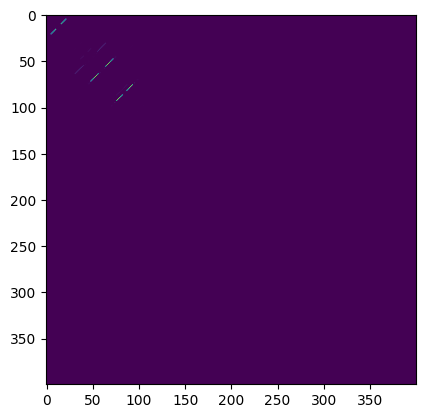

In [40]:
plt.imshow(load_and_convert(random.choice(fns), 400))